In [1]:
import sys  
sys.path.insert(0, '../')

In [2]:
from feature_extraction.data_builder import build_data_frame
import pandas as pd
import numpy as np
# import GPy

In [37]:
from pandas.plotting import scatter_matrix
from feature_extraction.hist_market_worker import HistMarketDataWorker
from feature_extraction.hist_market_worker import DEFAULT_CURVES_PATH, DEFAULT_CURVE_NAME

# hmdw = HistMarketDataWorker(DEFAULT_CURVES_PATH, DEFAULT_CURVE_NAME)
# hmdw.save()
hmdw = HistMarketDataWorker().load()

#first make some fake data with same layout as yours
data = pd.DataFrame(hmdw.get_train_curves(), columns=['1d', '1w', '1m', '3m','6m','1y','2y','5y','10y','20y'])

In [38]:
deltas = hmdw.get_deltas()
deltas = 1 / np.array(deltas)
data_factors = pd.DataFrame(-1 * np.log(data.values) * deltas * 365 * 100, columns=['1d', '1w', '1m', '3m','6m','1y','2y','5y','10y','20y'])

covariance plot


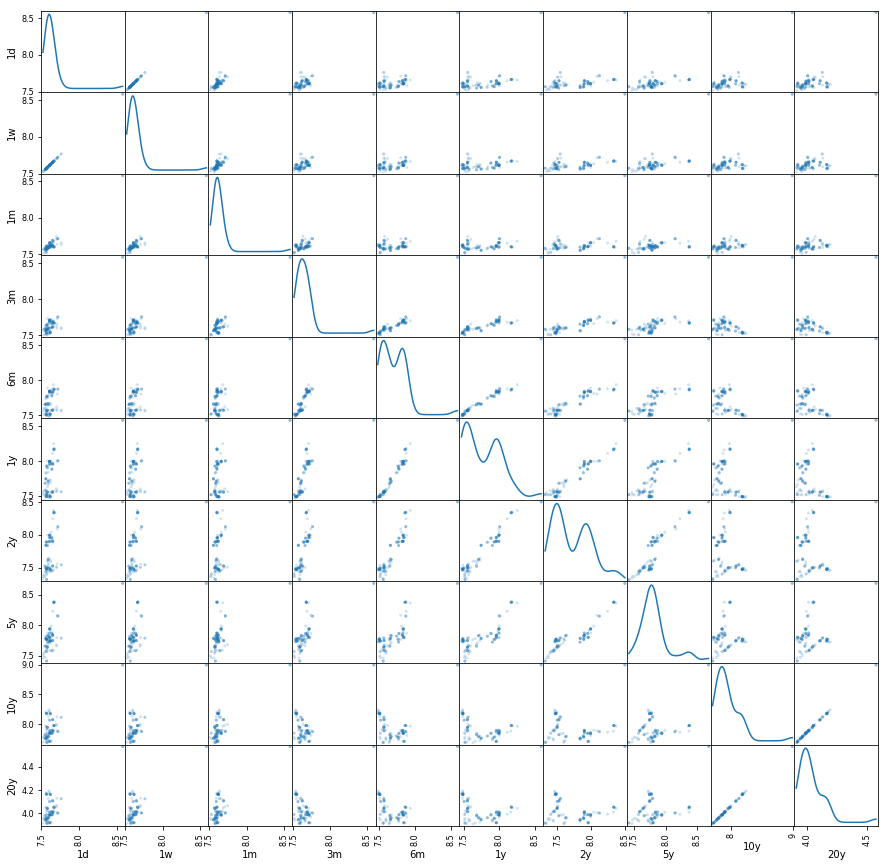

In [39]:
#now plot using pandas 
axarr = scatter_matrix(data_factors, alpha=0.2, figsize=(15, 15), diagonal='kde')
print('covariance plot')
# axarr[0,1].set_ylim(-10,10)
# axarr[0,1].set_xlim(-10,10)

In [6]:
# np.array(hmdw.get_train_curves()).shape

In [24]:
# data = build_data_frame(10)

size = 1000
data = pd.DataFrame({'loanSum': np.random.uniform(0, 100000, size=size),
                    'loanExpDaysLeft': np.random.uniform(0, 500, size=size)})
data['label'] = np.exp(-data['loanExpDaysLeft'] / 500) * data['loanSum']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['label']), data['label'], test_size=0.2)
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)


Name : GP regression
Objective : 299496139923.1451
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x259a17023c8>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x259a1702ef0>]}

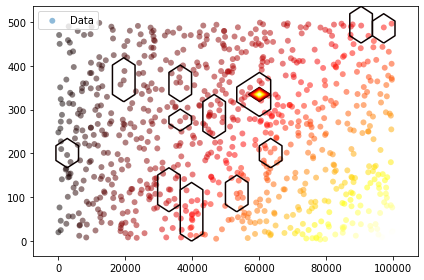

In [35]:
kernel = GPy.kern.RBF(input_dim=2)
m = GPy.models.GPRegression(X_train,Y_train,kernel)
print(m)
m.plot()

In [46]:
import json
with open('../json_real_patterns/test.json', 'r', encoding='utf-8') as loan_json:
    loan_dict = json.load(loan_json)
    
import requests
r = requests.post('http://loanpricing-01.vm.esrt.cloud.sbrf.ru:9010/api/fv', json=loan_dict)
print(r.status_code)

import pprint
r.json()

200


{'vanilla': 100646727.10288958,
 'option': 724173.0136253394,
 'algorithm': 'full',
 'messages': []}

In [7]:
import json
with open('../json_augmented/example.json', 'r', encoding='utf-8') as loan_json:
    loan_dict = json.load(loan_json)
    
import requests
r = requests.post('http://loanpricing-01.vm.esrt.cloud.sbrf.ru:9010/api/fv', json=loan_dict)
print(r.status_code)

import pprint
r.json()

ConnectionError: HTTPConnectionPool(host='loanpricing-01.vm.esrt.cloud.sbrf.ru', port=9010): Max retries exceeded with url: /api/fv (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000001DD50A085F8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [24]:
import numpy as np

n=100 # number of points in each vector
num_vects=25
vals=[]
for _ in range(num_vects):
    vals.append(np.random.normal(size=n))
np.cov(vals)

array([[ 9.45729125e-01, -1.22117036e-01,  6.39642740e-02,
         8.91458190e-02, -7.87519702e-03, -3.88057170e-02,
        -8.91983808e-02,  7.35966253e-02, -5.53426701e-02,
         1.55679301e-01,  1.67878806e-01,  1.32886481e-01,
        -1.28114262e-01, -7.75308319e-03, -3.96554140e-02,
         8.02400937e-02, -3.49280096e-03, -9.70004334e-02,
         4.48536668e-02, -5.69420922e-03, -1.62749898e-01,
        -6.48017971e-02,  1.74107842e-01, -4.93190751e-02,
         8.06780373e-03],
       [-1.22117036e-01,  9.12992894e-01, -1.30929762e-03,
        -5.15827246e-03, -1.80396708e-02, -9.70181434e-02,
        -8.54655206e-02,  1.47225230e-01, -3.73715371e-02,
        -9.35293528e-02, -9.50078349e-02, -7.02378994e-02,
        -5.52563564e-02,  6.88999884e-02, -6.91495615e-02,
        -1.54109775e-01, -2.89181635e-01,  1.12685617e-01,
        -4.55919351e-03,  9.58521874e-02,  1.39149534e-01,
        -4.24524102e-02, -7.86726205e-02, -4.47998208e-02,
        -3.99240568e-02],
    

In [26]:
np.array(vals).shape

(25, 100)

In [37]:
np.cov(vals, rowvar=False).shape

(100, 100)

In [34]:
np.mean(vals, axis=0).shape

(100,)

In [40]:
import scipy.stats as sps

var = sps.multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
var.pdf([1,0])

0.09653235263005393

In [41]:
type(np.array([0]))

numpy.ndarray

In [10]:
import numpy as np

deltas = [1, 7, 30, 3 * 30, 6 * 30, 12 * 30, 2 * 12 * 30, 5 * 12 * 30, 10 * 12 * 30, 20 * 12 * 30]
deltas = np.array(deltas)

r = np.random.normal(1, 3, size=len(deltas))
r

array([ 1.16691507,  0.62168282,  1.55942894,  1.96033072,  5.71251119,
       -1.03482177,  0.12720226,  3.99112402, -0.24917946,  4.16245508])

In [11]:
df = np.exp(-r * deltas / 365)
df

array([9.96808077e-01, 9.88148109e-01, 8.79701845e-01, 6.16702084e-01,
       5.97773289e-02, 2.77498717e+00, 7.78084983e-01, 2.83207705e-09,
       1.16774589e+01, 2.19100501e-36])

In [15]:
r = np.log(np.array(df)) * -1 / deltas * 365
r

array([ 1.16691507,  0.62168282,  1.55942894,  1.96033072,  5.71251119,
       -1.03482177,  0.12720226,  3.99112402, -0.24917946,  4.16245508])

In [19]:
A = np.array([[1, 2], [3, 4]])
b = np.array([2, 2])

(A - b) / b

array([[-0.5,  0. ],
       [ 0.5,  1. ]])

In [44]:
np.ones((10, 1)) * np.ones((10, 1))

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [50]:
np.ones(shape=(1, 1, 10))[:, 0, np.arange(10)]

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])